In [164]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [165]:
def add_lags(data, ticker, lags, window=20):
    cols = []
    df = data.copy()
    df.dropna(inplace=True)
    df['r'] = np.log(df['Close'] / df['Close'].shift(1))
    df['sma'] = df['Close'].rolling(window).mean()
    df['min'] = df['Close'].rolling(window).min()
    df['max'] = df['Close'].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean()
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True)
    df['d'] = np.where(df['r'] > 0, 1, 0)
    
    features = ['r', 'd', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols


In [166]:
start_date = datetime(2015, 3, 11)
end_date = datetime(2021, 3, 11)
interval = 'd'

tickers = ['HON']

In [167]:
for ticker in tickers:

    try:

        data = pd.DataFrame()

        #data['Open'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Open']
        #data['High'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['High']
        #data['Low'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Low']
        #data['Close'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Close']
        #data['Volume'] = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')['Volume']
        
        data = web.get_data_yahoo(ticker, start=start_date, end=end_date, interval='d')

        data['Ticker'] = ticker
        #df['day_of_week'] = df['Date'].dt.dayofweek

        #data.reset_index(inplace=True)
        
        print(ticker)
        #df.to_excel(ticker + '_dataset_.xlsx', index=False)

    except:
        print('Cannot calculate for ticker: ', ticker)

HON


In [168]:
data.shape

(1511, 7)

In [169]:
lags = 5
data, cols = add_lags(data, ticker, lags, window=20)

In [170]:
data

,High,Low,Open,Close,Volume,Adj Close,Ticker,r,sma,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-16,99.312500,98.244728,98.416336,99.074158,3524656.0,87.365273,HON,0.001252,98.941166,97.176956,...,0.000767,0.000228,0.001032,0.001081,0.001824,0.010970,0.011005,0.011539,0.011475,0.012069
2015-04-17,98.521210,96.156853,98.206596,96.957680,7044802.0,85.498909,HON,-0.021594,98.878244,96.957680,...,0.000039,0.000767,0.000228,0.001032,0.001081,0.010386,0.010970,0.011005,0.011539,0.011475
2015-04-20,98.044525,97.329498,97.386696,97.796646,3193200.0,86.238724,HON,0.008616,98.743819,96.957680,...,-0.000645,0.000039,0.000767,0.000228,0.001032,0.011343,0.010386,0.010970,0.011005,0.011539
2015-04-21,98.168457,96.309387,97.901520,96.604935,3313091.0,85.187851,HON,-0.012260,98.602243,96.604935,...,-0.001356,-0.000645,0.000039,0.000767,0.000228,0.010179,0.011343,0.010386,0.010970,0.011005
2015-04-22,97.577370,96.309387,96.509598,97.424835,3492245.0,85.910873,HON,0.008451,98.513103,96.604935,...,-0.001444,-0.001356,-0.000645,0.000039,0.000767,0.010270,0.010179,0.011343,0.010386,0.010970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-04,208.039993,200.509995,207.350006,202.940002,2797700.0,202.940002,HON,-0.019857,203.964999,200.589996,...,0.001692,0.002741,0.002702,-0.000121,0.001339,0.011952,0.012872,0.012877,0.015123,0.015325
2021-03-05,207.460007,201.779999,204.529999,206.580002,2857800.0,206.580002,HON,0.017777,204.264500,201.899994,...,0.000945,0.001692,0.002741,0.002702,-0.000121,0.012822,0.011952,0.012872,0.012877,0.015123
2021-03-08,212.449997,207.199997,207.539993,207.699997,3215900.0,207.699997,HON,0.005407,204.503500,201.899994,...,0.001471,0.000945,0.001692,0.002741,0.002702,0.013302,0.012822,0.011952,0.012872,0.012877


In [171]:
#Define some useful fumctions
import random
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [172]:
optimizer = Adam(learning_rate=0.0001)

In [173]:
def create_model(hl=2, hu=128, dropout=False, rate=0.3, regularize=False, reg=l1(0.0005), 
                optimizer=optimizer, input_dim=len(cols)):
    
    if not regularize:
        reg = None
    
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim, activity_regularizer=reg, activation='relu'))
    
    if dropout:
        model.add(Dropout(rate, seed=100))
    
    for _ in range(hl):
        model.add(Dense(hu, activity_regularizer=reg, activation='relu'))
        
        if dropout:
            model.add(Dropout(rate, seed=100))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
    

In [174]:
#Splits the datd
split = '2020-01-01'
train = data.loc[:split].copy()
train.drop(['Ticker'], axis=1, inplace=True)

In [175]:
#Shows the frequency of the labels data
np.bincount(train['d'])

array([539, 648], dtype=int64)

In [176]:
#Normalize the training features data
mu, std = train.mean(), train.std()
train_ = (train - mu) / std

In [177]:
train_

,High,Low,Open,Close,Volume,Adj Close,r,sma,min,max,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-16,-1.255215,-1.242594,-1.263200,-1.238818,0.314178,-1.273551,0.070002,-1.234282,-1.186919,-1.266717,...,0.133444,-0.120903,0.257379,0.280003,0.629441,0.188327,0.196453,0.330162,0.313412,0.462052
2015-04-17,-1.285995,-1.324772,-1.271399,-1.321666,2.832490,-1.342445,-2.029400,-1.236774,-1.195929,-1.266717,...,-0.209939,0.133129,-0.121657,0.256779,0.279217,0.041470,0.187756,0.195774,0.329522,0.312699
2015-04-20,-1.304538,-1.278617,-1.303450,-1.288825,0.077054,-1.315136,0.746716,-1.242098,-1.195929,-1.284523,...,-0.532012,-0.210289,0.132408,-0.122276,0.255997,0.282104,0.040886,0.187077,0.195127,0.328809
2015-04-21,-1.299717,-1.318768,-1.283325,-1.335474,0.162824,-1.353927,-1.171693,-1.247706,-1.210423,-1.284523,...,-0.867234,-0.532396,-0.211055,0.131802,-0.123006,-0.010459,0.281541,0.040199,0.186430,0.194418
2015-04-22,-1.322709,-1.318768,-1.337737,-1.303380,0.290991,-1.327238,0.731612,-1.251237,-1.210423,-1.284523,...,-0.908929,-0.867653,-0.533205,-0.211679,0.131037,0.012380,-0.011048,0.280867,0.039544,0.185721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.760864,1.807186,1.786869,1.784532,-1.759878,1.833291,-0.107542,1.814681,1.910154,1.742050,...,-0.276127,-0.244467,-0.325176,-0.958203,-0.640492,-0.367866,-0.366722,-0.356772,-0.280406,-0.356205
2019-12-26,1.762809,1.806792,1.791560,1.806844,-1.299018,1.853761,0.251594,1.811433,1.910154,1.742050,...,-0.254806,-0.276485,-0.245237,-0.325805,-0.958816,-0.369307,-0.368487,-0.367431,-0.357446,-0.281100
2019-12-27,1.776035,1.829227,1.811888,1.791186,-1.274551,1.839397,-0.253074,1.805610,1.910154,1.708888,...,-0.445596,-0.255161,-0.277260,-0.245863,-0.326507,-0.463541,-0.369928,-0.369197,-0.368106,-0.358138


In [178]:
#Create the DNN model
set_seeds()
model = create_model(hl=2, hu=64)

In [179]:
%%time
#Train the DNN model on the training data
model.fit(train_[cols], train['d'], epochs=20, verbose=False, validation_split=0.2, shuffle=False)

Wall time: 2.54 s


In [180]:
#Evaluate the performance of the model on the training data
model.evaluate(train_[cols], train['d'])

38/38 [==============================] - 0s 704us/step - loss: 0.6689 - accuracy: 0.6099


[0.6688817739486694, 0.6099410057067871]

In [181]:
#Vectorized backtest

# Generate the binary predictions
train['p'] = np.where(model.predict(train_[cols]) > 0.5, 1, 0)

#Translate the predictions into position values:
train['p'] = np.where(train['p'] ==1, 1, -1)

#Show the number of long and short positions
#train['p'].value_counts()

#Calculate the strategy performance values
train['s'] = train['p'] * train['r']

In [182]:
#Calculates the gross and net performances (in-sample)
train[['r', 's']].sum().apply(np.exp)

r    1.788778
s    4.166668
dtype: float64

In [183]:
#Calculates the gross and net performances (in-sample)
train[['r', 's']].sum().apply(np.exp) - 1

r    0.788778
s    3.166668
dtype: float64

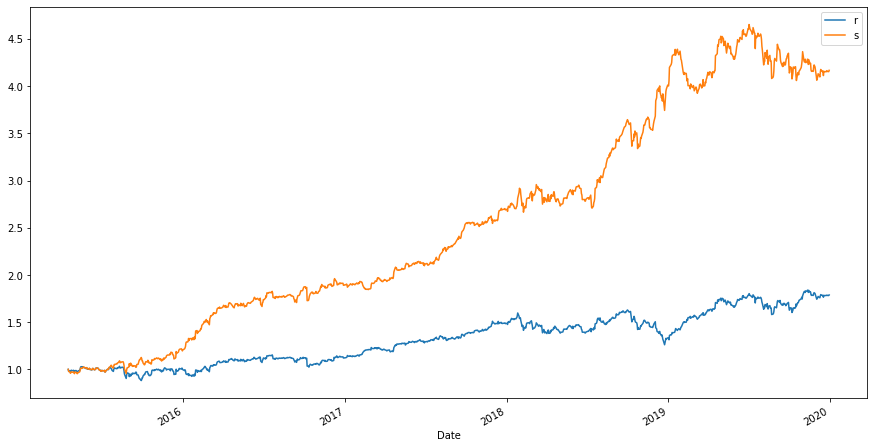

In [184]:
#Visualize the gross performancees over time
train[['r', 's']].cumsum().apply(np.exp).plot(figsize=(15, 8));

In [185]:
#Do the same on test data set
test = data.loc[split:].copy()
test.drop(['Ticker'], axis=1, inplace=True)

In [186]:
#Normalize the test data
test_ = (test - mu) /std

In [187]:
model.evaluate(test_[cols], test['d'])

10/10 [==============================] - 0s 1ms/step - loss: 0.7523 - accuracy: 0.5017


[0.7523197531700134, 0.5016722679138184]

In [188]:
test['p'] = np.where(model.predict(test_[cols]) > 0.5, 1, -1)

In [189]:
test['p'].value_counts()

 1    185
-1    114
Name: p, dtype: int64

In [190]:
test['s'] = test['p'] * test['r']

In [191]:
test[['r', 's']].sum().apply(np.exp)

r    1.202881
s    0.850816
dtype: float64

In [192]:
test[['r', 's']].sum().apply(np.exp) - 1

r    0.202881
s   -0.149184
dtype: float64

In [193]:
test.shape, test_.shape, test['r'].shape, test['s'].shape

((299, 50), (299, 48), (299,), (299,))

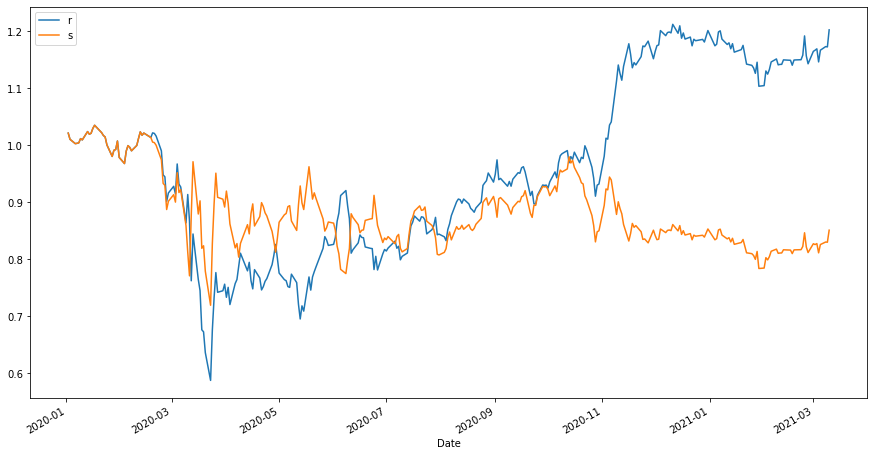

In [194]:
test[['r', 's']].cumsum().apply(np.exp).plot(figsize=(15, 8));

In [195]:
data[['Close', 'SMA1', 'SMA2']].plot(figsize=(15, 8))

KeyError: "['SMA1', 'SMA2'] not in index"

In [ ]:
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data['p'] = data['p'].shift(1)
data.dropna(inplace=True)

In [ ]:
columns = ['Close', 'SMA1', 'SMA2', 'p']
data[columns].plot(figsize=(15,8), secondary_y='p');

In [ ]:
data['r'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)
#Calculates the strategy returns
data['s'] = data['p'] * data['r']

In [ ]:
#Calculates the gross performances
data[['r', 's']].sum().apply(np.exp)

In [ ]:
#Visualizes the gross performances over time
data[['r', 's']].cumsum().apply(np.exp).plot(figsize=(15,8));